# Validation of Godt and others (2008)

In this section, we demonstrate that our implementation of the Godt and others (2008) model yields similar output as results reported in the original paper. Because Godt and others (2008) used much older versions of the shakemaps for these two events that are no longer available and we could not implement the same colorbars, the results do not match perfectly.


## Wenchuan earthquake



In [9]:
#stdlib imports
from configobj import ConfigObj
import os
import pprint
import numpy as np
import matplotlib.cm as cm

#local imports
from gfail.godt import godt2008
from gfail.conf import correct_config_filepaths
from gfail.utilities import parseConfigLayers, parseMapConfig
from gfail import makemaps

import warnings
warnings.filterwarnings('ignore')

# Set up file paths
# Directory containing model inputs
datadir = 'data/model_inputs/wenchuan'
# Path to mapping inputs for static plots
map_inputs = 'data/mapping_inputs/wenchuan'

# Path to config files
configfileZ2 = '../defaultconfigfiles/models/godt_2008.ini'
mapconfig = '../defaultconfigfiles/mapconfig.ini'

# Path to shakemap .xml files
shakefile = 'data/shakemaps/wenchuan.xml'

In [2]:
# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileZ2)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)
# View the config file
#pprint.pprint(config)

In [3]:
bounds = dict(xmin=102., xmax=106., ymin=30., ymax=33.2)

# Run the model (this will take a minute)
maplayers = godt2008(shakefile, config, saveinputs=False, bounds=bounds)

### Change bins to match figure from paper


In [4]:
lims = [[0., 0.011, 0.11, 0.31, 0.51, 0.71, 0.91, 0.991, 1.]]
#colorlist = ['#108CFA','#0DCFFD', '#D146FC', '#66F72C', '#FEFA34', '#FFB729', '#FE2B19']  #hex code for colors in figure below
#CustomCmap = matplotlib.colors.ListedColormap(colorlist) #'#FFFFFF', 
#colormap = [CustomCmap]
colormap = [cm.jet]
maskthresh = [0.01]  # to represent gray color on figure

### Create the figure

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed

No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


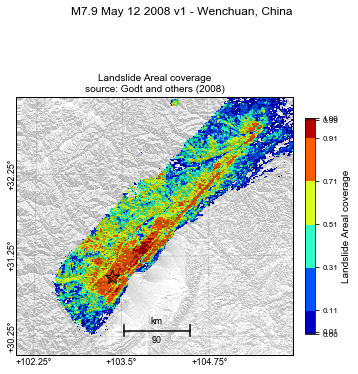

In [5]:
# read in general mapping preferences
mapconfig = ConfigObj(mapconfig)
kwargs = parseMapConfig(mapconfig, fileext=map_inputs)

# Make the figure
temp = makemaps.modelMap(maplayers, shakefile, lims=lims, maskthreshes=maskthresh, plotorder=['model'],
         logscale=False, maproads=True, mapcities=True, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds,
         colormaps=colormap, **kwargs)

### Compare to the result from the original paper for this event (below)
<img src="data/images/godt2008_wenchuan.png" alt="From Paper" style="width: 500px;" align="left"/>

## Northridge

In [6]:
# Path to shakemap .xml files
shakefile2 = 'data/shakemaps/northridge.xml'
bounds2 = dict(xmin=-119.1, xmax=-118., ymin=34., ymax=34.7)

# Set up file paths
# Directory containing model inputs
datadir = 'data/model_inputs/northridge'
# Path to mapping inputs for static plots
map_inputs = 'data/mapping_inputs/northridge'

# Reread config file
# Read in the config file for this model. This contains all of the information needed to run the model
config = ConfigObj(configfileZ2)

# append the data directory to the relative paths in the config file
config = correct_config_filepaths(datadir, config)

# read in general mapping preferences
kwargs2 = parseMapConfig(mapconfig, fileext=map_inputs)

roadfolder not valid - roads will not be displayed

cities file not valid - cities will not be displayed



In [7]:
# Run the model (this will take a minute)
maplayers2 = godt2008(shakefile2, config, saveinputs=False, bounds=bounds2)

No output location given, using current directory for outputs

Input boundaries are almost the same as specified boundaries, no cutting needed
Not able to read specified ocean file, will use default ocean masking


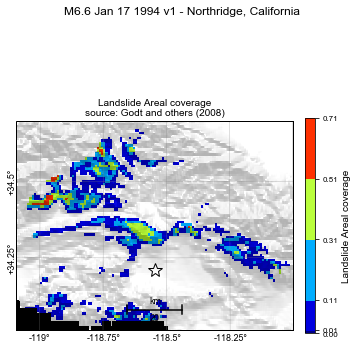

In [8]:
lims2 = [[0., 0.011, 0.11, 0.31, 0.51, 0.71]]
#colorlist2 = ['#108CF9','#A6E42C', '#FEFA34', '#FFB729', '#FE2B19']  #hex code for colors in figure below
#CustomCmap2 = matplotlib.colors.ListedColormap(colorlist2) #'#FFFFFF', 
#colormap2 = [CustomCmap2]
colormap2 = [cm.jet]

maskthresh = [0.009]  # to represent gray color on figure

# Make the figure
temp = makemaps.modelMap(maplayers2, shakefile2, lims=lims2, maskthreshes=maskthresh, plotorder=['model'],
         logscale=False, maproads=True, mapcities=True, showplots=True, printparam=False,
         inventory_shapefile=None, scaletype='binned', savepdf=False, savepng=False, boundaries=bounds2,
         colormaps=colormap2, **kwargs2)

### Compare to the result from the original paper for this event (below)
<img src="data/images/godt2008_northridge.png" alt="From Paper" style="width: 500px;" align="left"/>